In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.decomposition import FactorAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,  StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

### Податоци

In [2]:
data = pd.read_csv("../data/data.csv")
data = data.drop(["Unnamed: 0","Manufacturer"],axis=1)
print("Number of records = " + str(data.shape[0]))
print("Number of features = " + str(data.shape[1]))
data.head()

Number of records = 378
Number of features = 72


,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,Number of SIMs,...,Brand__Motorola,Brand__Nokia,Brand__OnePlus,Brand__Oppo,Brand__Realme,Brand__Samsung,Brand__Tecno,Brand__Vivo,Brand__Xiaomi,logPrice
0,4000,6.53,1,128,1,1,1,0,0,2.0,...,0,0,0,1,0,0,0,0,0,10.085392
1,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,10.221905
2,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,9.897972
3,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,10.645401
4,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,10.064671


In [3]:
data.describe()

,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,Number of SIMs,...,Brand__Motorola,Brand__Nokia,Brand__OnePlus,Brand__Oppo,Brand__Realme,Brand__Samsung,Brand__Tecno,Brand__Vivo,Brand__Xiaomi,logPrice
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,...,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,3839.119048,6.132751,0.978836,89.968254,0.984127,0.817460,0.825397,0.119048,0.248677,1.939153,...,0.005291,0.034392,0.013228,0.068783,0.129630,0.156085,0.010582,0.182540,0.222222,9.660766
std,730.000661,0.441658,0.144122,88.120601,0.125150,0.386801,0.380130,0.324274,0.432819,0.239365,...,0.072643,0.182474,0.114399,0.253420,0.336341,0.363417,0.102459,0.386801,0.416291,0.738215
min,1715.000000,4.600000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.515191
25%,3370.000000,6.000000,1.000000,32.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.121509
50%,4000.000000,6.260000,1.000000,64.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.512148
75%,4230.000000,6.390000,1.000000,128.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.042815
max,6000.000000,6.780000,1.000000,512.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.013695


In [4]:
boolean_columns = ['Touchscreen', 'Headphones','Face unlock', 'Fingerprint sensor', 'Wireless charging',
       'NFC', '4G/ LTE', '5G','3G', 'EDGE', 'GPRS', 'Wi-Fi', 'VoLTE', 'Bluetooth', 'GPS', 'FM Radio', 'Fast Charging', 'Removable Battery',
       'Card Slot', 'Light Sensor', 'Compass Sensor', 'Proximity Sensor', 'Magnetic Sensor',
       'Gravity Sensor', 'Heathtracking Sensor', 'Gyroscope Sensor', 'Accelerometar Sensor',
       'Vibration Sensor', 'Laser Sensor']
categorical_columns = ['SIM Type', 'Usb Type', 'OS', 'cpuCores', 'Chipset', 'Flash','Launched_Month', 'Launched_Year']
numerical_columns = ['Battery capacity', 'Screen Size', 'Internal storage','Number of SIMs','Expandable storage', 'Price'
                    ,'CPU', 'RAM', 'Rear Camera', 'Front Camera','PPI','Width', 'Height', 'Weight','Number of Rear Cameras','Resolution_x', 
                     'Resolution_y','logPrice']
brand_columns = ['Brand__Coolpad', 'Brand__Google', 
       'Brand__Huawei', 'Brand__Infinix', 'Brand__LG', 'Brand__Lenovo',
       'Brand__Micromax', 'Brand__Motorola', 'Brand__Nokia', 'Brand__OnePlus',
       'Brand__Oppo',  'Brand__Realme', 'Brand__Samsung',
       'Brand__Tecno', 'Brand__Vivo', 'Brand__Xiaomi','Brand__Apple']

## Отстранување на outlierи

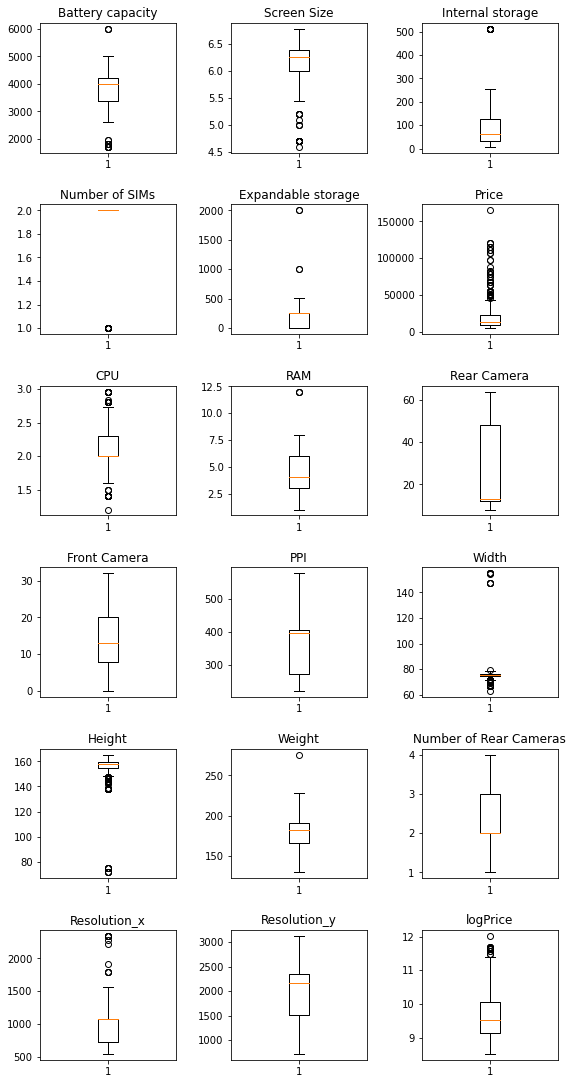

In [5]:
plt.figure(figsize=(9,18))
for i in range(1,len(numerical_columns)+1):
    ax=plt.subplot(6, 3, i)
    ax.boxplot(data[numerical_columns[i-1]])
    ax.set_title(numerical_columns[i-1])

plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)
plt.show()

In [6]:
for column in numerical_columns:
    data[(np.abs(stats.zscore(data[column])) < 3)].all(axis=1)
    
print("Number of records after removing outliers = " + str(data.shape[0]))


Number of records after removing outliers = 378


Покрај визуелизациите прикажани на boxplot-овите, z-тестот покажува дека девијацијата на вредноста на атрибутите припаѓа во интервалот на 3-сигми

## Визуелизации

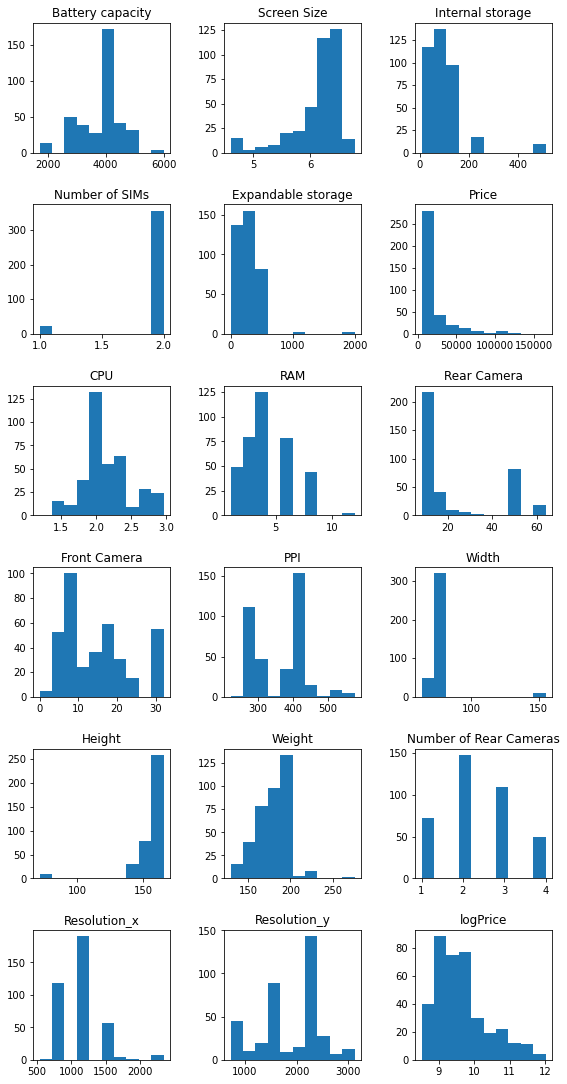

In [7]:
plt.figure(figsize=(9,18))
for i in range(1,len(numerical_columns)+1):
    ax=plt.subplot(6, 3, i)
    ax.hist(data[numerical_columns[i-1]])
    ax.set_title(numerical_columns[i-1])
    
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)
plt.show()

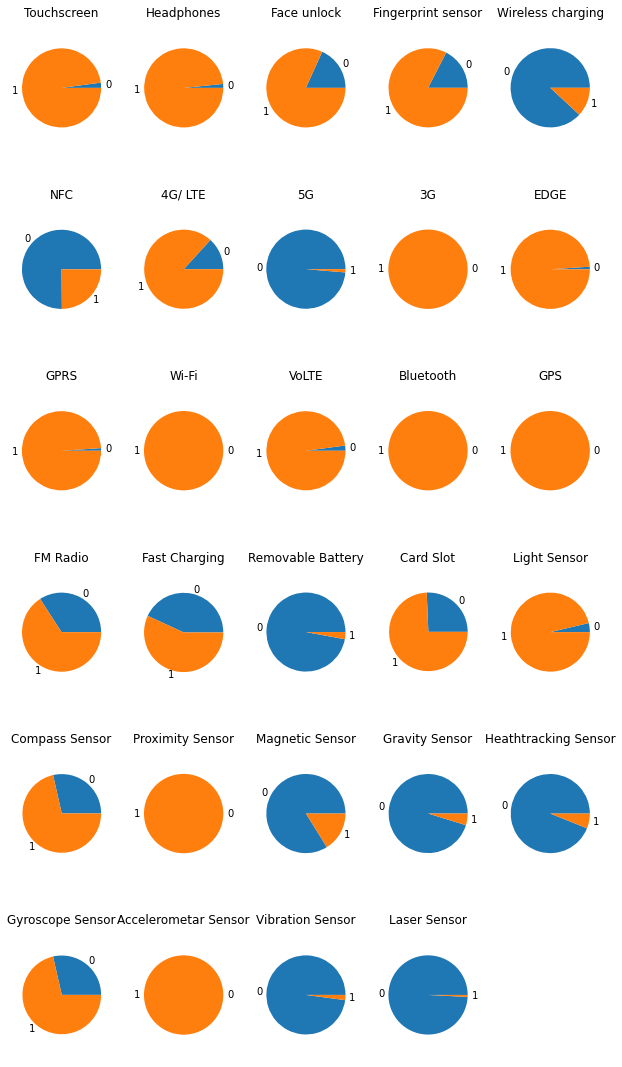

In [8]:
plt.figure(figsize=(10,18))
for i in range(1,len(boolean_columns)+1):
    n = len(data[boolean_columns[i-1]])
    n_1 = sum(data[boolean_columns[i-1]].tolist())
    ax=plt.subplot(6, 5, i)
    patches, texts = ax.pie([n-n_1,n_1],labels=[0,1])
    ax.axis('equal')
    ax.set_title(boolean_columns[i-1])
     
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)
plt.show()

Од некои не добиваме никакви информации затоа што сите се сите иста вредност. Имаме и мн со над 90% иста вредност но сега за сега ќе ги оставиме па во процесот на избирање на features за моделите ќе се справиме со нив

In [9]:
to_remove = ['3G', 'Wi-Fi', 'Bluetooth', 'GPS', 'Proximity Sensor', 'Accelerometar Sensor']
data = data.drop(to_remove,axis=1)
for column in to_remove:
    boolean_columns.remove(column)
print("Removed " + str(len(to_remove)) + " features")
print("Updated number of features = " + str(data.shape[1]))

Removed 6 features
Updated number of features = 66


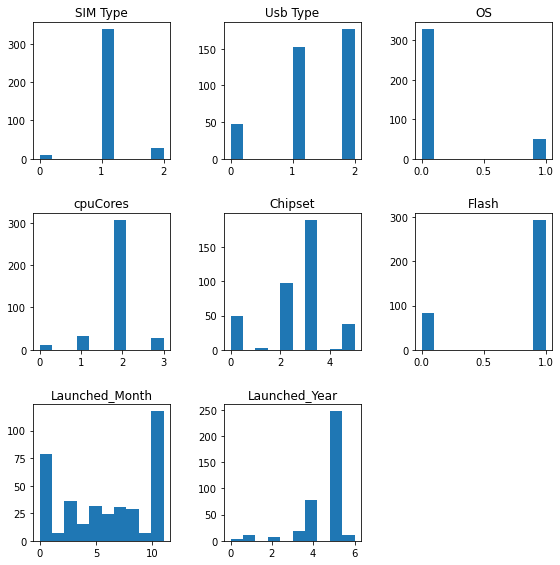

In [10]:
plt.figure(figsize=(9,9))
for i in range(1,len(categorical_columns)+1):
    ax=plt.subplot(3, 3, i)
    ax.hist(data[categorical_columns[i-1]])
    ax.set_title(categorical_columns[i-1])
    
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)
plt.show()

In [11]:
correlated_columns = set()
for i in range(len(data.columns)):
    for j in range(i+1,len(data.columns)):
        correlation = data[data.columns[i]].corr(data[data.columns[j]]) 
        if correlation > 0.6:
            correlated_columns.add(data.columns[i])
            correlated_columns.add(data.columns[j])
correlated_columns = list(correlated_columns)

Text(0.5, 1.0, 'Correlation Heatmap')

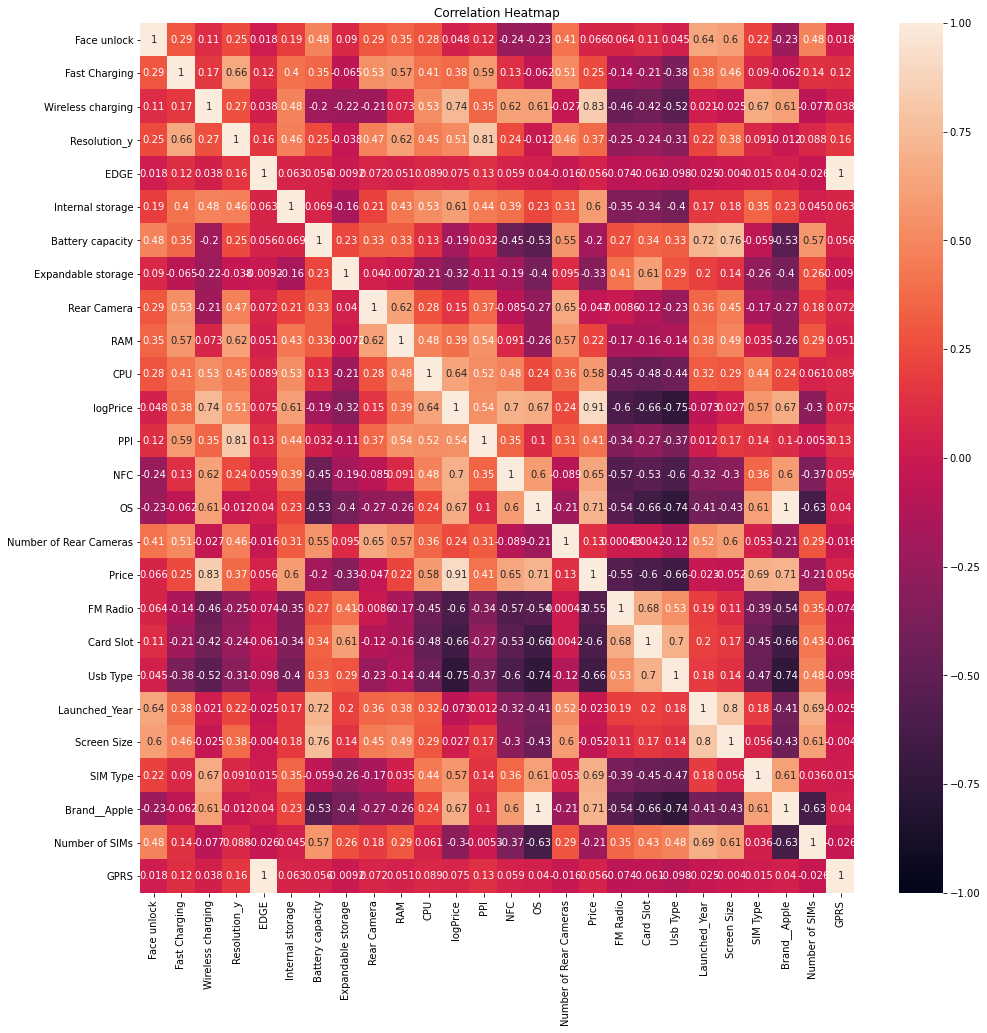

In [12]:
correlated_data = data[correlated_columns]
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(correlated_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})

In [13]:
to_remove = ['OS', 'EDGE']
data = data.drop(to_remove,axis=1)
boolean_columns.remove('EDGE')
categorical_columns.remove('OS')
print("Removed " + str(len(to_remove)) + " features")
print("Updated number of features = " + str(data.shape[1]))

Removed 2 features
Updated number of features = 64


## Регресија

In [14]:
data = data.drop(['Price'], axis=1)
data

,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,Number of SIMs,...,Brand__Motorola,Brand__Nokia,Brand__OnePlus,Brand__Oppo,Brand__Realme,Brand__Samsung,Brand__Tecno,Brand__Vivo,Brand__Xiaomi,logPrice
0,4000,6.53,1,128,1,1,1,0,0,2.0,...,0,0,0,1,0,0,0,0,0,10.085392
1,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,10.221905
2,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,9.897972
3,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,10.645401
4,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,10.064671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,3000,5.20,1,64,1,0,1,0,1,2.0,...,1,0,0,0,0,0,0,0,0,9.535968
374,3000,5.20,1,32,1,0,1,0,1,2.0,...,1,0,0,0,0,0,0,0,0,9.535968
375,2900,5.70,1,32,1,0,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,8.515191
376,3000,5.70,1,64,1,0,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,8.809714


In [15]:
features = [x for x in data.columns if x != 'logPrice' ]

In [16]:
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

In [17]:
# X_train will include the validation partition
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)
print(data_train.shape, data_test.shape)

(302, 63) (76, 63)


In [18]:
def my_cv(data_inner, model, steps=10, use_dim_red=False):
    data_inner = data_inner.sort_values(by=['logPrice'])
    number_of_samples = len(data_inner)
    number_of_batches = 10
    batch_size = number_of_samples // number_of_batches
    list_of_classes = []
    fake_class=1
    counter=0
    for _, _ in data_inner.iterrows():
        if counter > fake_class * batch_size and fake_class < number_of_batches:
            fake_class += 1
        list_of_classes.append(fake_class)
        counter += 1
    scores_inner = []
    errors = []
    folder = StratifiedKFold(n_splits=steps)

    splits = folder.split(data_inner, list_of_classes)
    for train_index, val_index in splits:

        training_data = data_inner.iloc[train_index, :]
        validation_data = data_inner.iloc[val_index, :]

        X_train_inner = training_data.drop(['logPrice'], axis=1)
        y_train_inner = training_data['logPrice']

        X_val = validation_data.drop(['logPrice'], axis=1)
        y_val = validation_data['logPrice']

        if use_dim_red:
            fa = FactorAnalysis(n_components=8)
            fa.fit(X_train_inner)
            X_train_inner = fa.transform(X_train_inner)
            X_val = fa.transform(X_val)

        model.fit(X_train_inner, y_train_inner)
        predictions = model.predict(X_val)
        score = model.score(X_val, y_val)
        error = mean_squared_error(predictions, y_val)
        scores_inner.append(score)
        errors.append(error)
        print(score)

    print(f'Scores mean: {np.mean(scores_inner)}')
    print(f'Scores std: {np.std(scores_inner)}')
    print(f'Error mean: {np.mean(errors)}')
    return np.mean(scores_inner)

In [19]:
reg = LinearRegression()
print("Plain data")
my_cv(data_train, reg)
print()
print("Using Dimensionality Reduction (Factor Analysis)")
my_cv(data_train, reg, use_dim_red=True)

Plain data
0.9292435219255543
-1.0834098206881109e+24
0.8640310782919591
-4.612460484026873e+24
0.8454012125733391
0.9254194490675978
-2.6236854096267705e+22
0.928266546573284
0.8955751829526216
-9.045041606722997e+22
Scores mean: -5.812557574878482e+23
Scores std: 1.3812623085578185e+24
Error mean: 2.5635619085603177e+23

Using Dimensionality Reduction (Factor Analysis)
0.8646578147933806
0.8890306991953503
0.8048081527665607
0.8431700900585115
0.8137357773803545
0.9046158376749422
0.9282107177247481
0.8760598623326218
0.8428594276673028
0.8498824245943455
Scores mean: 0.8617030804188118
Scores std: 0.036881695708922226
Error mean: 0.07281252854685202


0.8617030804188118

In [20]:
alphas = range(1, 7, 1)
solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
for a in alphas:
    for s in solvers:
        ridge = Ridge(alpha=a/10, solver=s)
        print(f"Plain data (alpha={a}, solver={s})")
        my_cv(data_train, ridge)
        print()
        print("Using Dimensionality Reduction (Factor Analysis)")
        my_cv(data_train, ridge, use_dim_red=True)

Plain data (alpha=1, solver=auto)
0.9121117246699494
0.9308408196438989
0.8865272977878641
0.9035754951294086
0.8571563285824372
0.9542306732958457
0.9222555121244533
0.9409284427766355
0.8934373480416161
0.8040108309833588
Scores mean: 0.9005074473035467
Scores std: 0.04182529521399431
Error mean: 0.054460597318527926

Using Dimensionality Reduction (Factor Analysis)
0.864649180234079
0.8890669649480715
0.8048146083892174
0.8432508648150936
0.8137258040446744
0.9045993561053982
0.9281969326098135
0.87611323551602
0.8428946950289766
0.8498530960387178
Scores mean: 0.8617164737730063
Scores std: 0.036877383791893724
Error mean: 0.07280619249959752
Plain data (alpha=1, solver=svd)
0.9121117246699494
0.9308408196438989
0.8865272977878651
0.9035754951294104
0.857156328582436
0.9542306732958455
0.9222555121244532
0.9409284427766352
0.8934373480416167
0.8040108309833587
Scores mean: 0.9005074473035469
Scores std: 0.04182529521399438
Error mean: 0.054460597318527884

Using Dimensionality Redu

In [21]:
depths = range(2, 5)
n_estimators=range(5, 30, 5)
max_features=range(8, 12)
min_acc = 0
config = dict()
for d in depths:
    for n in n_estimators:
        for m in max_features:
            print(f"RandomForestRegressor with depth: {d}, no. of estimators: {n} and max features: {m}")
            rfr = RandomForestRegressor(max_depth=d, n_estimators=n, max_features=m)
            acc = my_cv(data_train, rfr)
            if acc > min_acc:
                min_acc = acc
                config['max_depth'] = d
                config['n_estimators'] = n
                config['max_features'] = m
            print()
config

RandomForestRegressor with depth: 2, no. of estimators: 5 and max features: 8
0.7322584577107143
0.5352929423836295
0.6084517838551633
0.7935437403541498
0.7091981900240751
0.835467953572234
0.8377330704970305
0.8172524418687771
0.8003466950421216
0.7974409799438834
Scores mean: 0.746698625525178
Scores std: 0.09706277590181236
Error mean: 0.1290742185793099

RandomForestRegressor with depth: 2, no. of estimators: 5 and max features: 9
0.6427736851341626
0.8110428913930865
0.4718749222327433
0.7578427826814382
0.5515952012739149
0.684332881891565
0.8032346730956913
0.8286151532496334
0.808119557401484
0.688549548759176
Scores mean: 0.7047981297112895
Scores std: 0.11491372535302817
Error mean: 0.15209112350621534

RandomForestRegressor with depth: 2, no. of estimators: 5 and max features: 10
0.6505473303503222
0.6496894655751082
0.478097662321026
0.8277545985694457
0.6306643331121893
0.6498518893526174
0.8217374297491586
0.7966574638765701
0.725793389270496
0.7440502924565537
Scores me

{'max_depth': 4, 'n_estimators': 25, 'max_features': 9}

In [22]:
neighbors = range(1, 7)
algs = ['auto', 'ball_tree', 'kd_tree', 'brute']
max_acc = 0
knn_conf = dict()
for n in neighbors:
    for alg in algs:
        knnr = KNeighborsRegressor(n, algorithm=alg)
        print(f"Plain data neighbors={n}")
        acc = my_cv(data_train, knnr)
        print("Using Dimensionality Reduction (Factor Analysis)")
        my_cv(data_train, knnr, use_dim_red=True)
        if acc > max_acc:
            max_acc = acc
            knn_conf['n']=n
            knn_conf['algorithm']=alg
        print()

Plain data neighbors=1
0.8180711594116641
0.9178197213764687
0.8821940485631066
0.8901375256063038
0.8509611020045219
0.9011734602431993
0.8292112718400214
0.8646433611373446
0.8825283050198233
0.8907185648156626
Scores mean: 0.8727458520018117
Scores std: 0.03012481286753155
Error mean: 0.06721548603497066
Using Dimensionality Reduction (Factor Analysis)
0.8276813418967977
0.9544167870588675
0.870442691869496
0.46283056451394744
0.9010411811995895
0.9101000160345792
0.7827300193918719
0.7939423014544598
0.9049044852288584
0.7713676488777581
Scores mean: 0.8179457037526225
Scores std: 0.13210857783264565
Error mean: 0.09537743550398671

Plain data neighbors=1
0.8180711594116641
0.9178197213764687
0.8821940485631066
0.8901375256063038
0.8509611020045219
0.9011734602431993
0.8292112718400214
0.8646433611373446
0.8825283050198233
0.8907185648156626
Scores mean: 0.8727458520018117
Scores std: 0.03012481286753155
Error mean: 0.06721548603497066
Using Dimensionality Reduction (Factor Analysi

In [23]:
knn_conf

{'n': 2, 'algorithm': 'brute'}

In [25]:
reg_fin = LinearRegression()
ridge_fin = Ridge()
rfr_fin = RandomForestRegressor(max_depth=4, n_estimators=25, max_features=9)
knnr_fin = KNeighborsRegressor(2, algorithm='brute')

model_name_list = [
    ('LinearRegression', reg_fin),
    ('Ridge', ridge_fin),
    ('RandomForestRegressor', rfr_fin),
    ('KNeighborsRegressor', knnr_fin)
]

for name, model in model_name_list:
    print(f"Model: {name}")
    model.fit(data_train[features], data_train['logPrice'])
    pred = model.predict(data_test[features])
    print("Regression score:", model.score(data_test[features], data_test['logPrice']))
    print("Mean square error: ", mean_squared_error(pred, data_test['logPrice']))
    print()

Model: LinearRegression
Regression score: 0.9202588165518053
Mean square error:  0.04269440379247825

Model: Ridge
Regression score: 0.9265042056276293
Mean square error:  0.03935054618322181

Model: RandomForestRegressor
Regression score: 0.9041151167619945
Mean square error:  0.051337937882720466

Model: KNeighborsRegressor
Regression score: 0.9155655491657997
Mean square error:  0.04520723648719706



In [26]:
reg_fin = LinearRegression()
ridge_fin = Ridge()
rfr_fin = RandomForestRegressor(max_depth=4, n_estimators=25, max_features=9)
knnr_fin = KNeighborsRegressor(2, algorithm='auto')

model_name_list = [
    ('LinearRegression', reg_fin),
    ('Ridge', ridge_fin),
    ('RandomForestRegressor', rfr_fin),
    ('KNeighborsRegressor', knnr_fin)
]
test_log_prices=data_test['logPrice']
train_log_prices=data_train['logPrice']
data_test_no_manufacturer=data_test.drop(brand_columns,axis=1).drop(['logPrice'],axis=1)
data_train_no_manufacturer=data_train.drop(brand_columns,axis=1).drop(['logPrice'],axis=1)
for name, model in model_name_list:
    print(f"Model: {name}")
    model.fit(data_train_no_manufacturer, train_log_prices)
    pred = model.predict(data_test_no_manufacturer)
    print("Regression score:", model.score(data_test_no_manufacturer, test_log_prices))
    print("Mean square error: ", mean_squared_error(pred, test_log_prices))
    print()

Model: LinearRegression
Regression score: 0.8796895669116752
Mean square error:  0.06441567567225726

Model: Ridge
Regression score: 0.88762167878843
Mean square error:  0.06016872606919176

Model: RandomForestRegressor
Regression score: 0.8975079969717698
Mean square error:  0.05487547053562367

Model: KNeighborsRegressor
Regression score: 0.9088491818065214
Mean square error:  0.048803261623216555

